# Собираем свою первую нейросетку



Фрэймворком для обучения нейросеток на нашем курсе будет Tensorflow. Причин для этого очень много. Их мы обсудили на лекции. Недавно Google анонсировал вторую версию библиотеки. В апреле 2019 года закончилось тестирование альфа-версии (внутри компании) и [была выпущена](https://www.tensorflow.org/beta/guide/effective_tf2) бета-версия. В конце августа была подготовлена версия для релиза. Первая версия библиотеки продолжит поддерживаться, но со временем умрёт. 

Одна из особенностей новой версии заключается в том, что Keras (раньше он был посторонней библиотекой-надстройкой) фактически [стал частью tensorflow.](https://www.tensorflow.org/guide/keras?hl=ru)  

Изначально Keras создавался как высокоуровневое API для theano (это когда написали кучу функций один раз, красиво их назвали и завернули в пакет). Потом он начал поддерживать tensorflow, а сейчас вот чуть ли ни аннексия произошла. __Keras наш.__ Именно со знакомства с ним мы и начнём наше погружение в нейросетки.  

Чтобы установить библиотеку, отправляйтесь в консоль и пропишите 

```
pip install tensorflow==2.0.0-beta1 
```

Если вы до этого сидели на старой версии tensorflow, на всякий случай снесите её. Иначе при установке могут возникнуть какие-нибудь несовместимости и ошибки.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Подгружаем tensorflow 
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)
print(tf.keras.__version__) 

2.0.0-beta1
2.2.4-tf


In [3]:
# Подгрузим ещё немного пакетов :) 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

## Что за задачу решаем? 

Наша главная цель - как следует потрогать Keras своими ручищами. Мы хотим увидеть, что он реально позволяет обращаться с нейронками как с конструктором LEGO и предлагает нам для сборки башен кучу деталей. 

Давайте возьмём для примера задачку регрессии и набор с [ценами на квартиры в Бостоне.](https://www.kaggle.com/apratim87/housingdata/downloads/housingdata.zip/1) Этот датасет уже лежит в библиотеке.


In [4]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, X_test.shape

((404, 13), (102, 13))

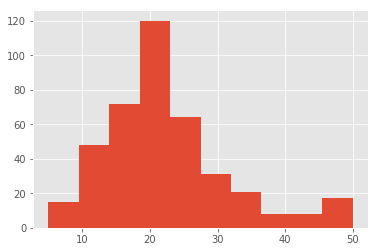

In [5]:
plt.hist(y_train);

# 1. Бэйзлайн 

Прежде, чем учить 228-слойных монстров, давайте построим какие-нибудь простые прогнозы, чтобы было с чем сравнить. Давайте построи наивный прогноз, а также обучим линейную регрессию. В качестве метрики попробуем использовать MAE.

### Наивный прогноз

In [6]:
from sklearn.metrics import mean_absolute_error

y_naive = np.median(y_train)
mean_absolute_error(y_test, [y_naive]*len(y_test))

6.660784313725491

Получаем ошибку в $6$ тысяч долларов. __Это много или мало?__ 

### Линейная регрессия

In [7]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression( )

model_regression.fit(X_train, y_train)
y_regression = model_regression.predict(X_test)

mean_absolute_error(y_test, y_regression)

3.4641858124067197

Кстати говоря, для того, чтобы смотреть насколько хорошими в случае регрессии получились прогнозы, можно строить такие вот картинки. 

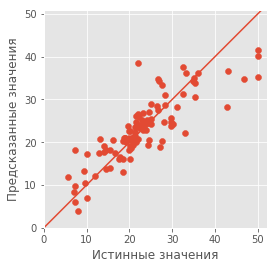

In [8]:
plt.scatter(y_test, y_regression)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Можно построить и для тренировочной выборки. 

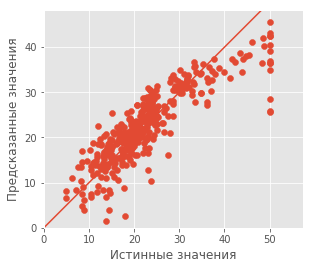

In [9]:
plt.scatter(y_train, model_regression.predict(X_train))
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Полезно написать небольшую функцию, которая могла бы строить две такие картинки рядом и показывать насколько хорошо работает наша модель и не переобучились ли мы.

# 2. Собираем свою нейросетку

In [10]:
from tensorflow.keras import layers              # Уже готовые слои для моделей
from tensorflow.keras.models import Sequential   # Специальный класс для склеивания слоёв
from tensorflow.keras.models import Model        # Альтернативный класс для склейки слоёв
import tensorflow.keras.optimizers as opt        # Разные оптимизационные алгоритмы :3 

Модель в Keras собирается как конструктор LEGO. Её можно описать двумя основными способами. Первый — последовательное описание модели. В его случае мы как бы создаём коробочку `model` и постепенно добавляем туда детальки нашей сетки. 

Второй способ - описать модель функционально, в явном виде прописав какие аргументы идут на вход какому слою. 

Когда мы будем строить сложные модели с кучей разветвлений, для нас будет удобным второй способ. Для простых ситуаций вроде текущей, можете пользоваться первым. 

Давайте соберём небольшую нейронку. Давайте сделаем в ней вот такую архитектуру: 

In [11]:
def get_new_model( ):

    # Ваш код! 
    
    
    # В качестве оптимизации будем использовать Adam
    # Это такой специальный градиентный спуск, обсудим его в следущий раз
    optimizer = opt.Adam(lr=1e-3)

    # Собираем модель
    model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])
    
    return model

Перед тем как обучать нашу нейросеть, нужно задать параметры обучения. Во-первых, метод оптимизации. Во-вторых, функцию потерь. В-третьих, парочку метрик, на которые нам хотелось бы смотреть в процессе обучения.  Для этого есть метод `compile`. 

In [12]:
model = get_new_model()

Итак, только что мы собрали свою первую нейросеть со скрытым слоем.   Посмотрим сколько параметров нам предстоит оценить. 

In [13]:
model.summary()

Model: "Ahmed"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


Видим, что нужно оценить огромное количество параметров. На оценку каждого параметра придётся совсем маленькое количество наблюдений. 

In [14]:
X_train.shape[0]/261

1.5478927203065134

Отлично! Модель собрана. Осталось её обучить. Метод `fit` позволяет сделать это. Он принимает на вход обучающую выборку `X_train, y_train`. Параметр  `batch_size` это  размер батча. Этот параметр ограничивает количество примеров, которое за раз подаётся в нашу нейронную сеть. Количиство эпох для обучения, `epochs` - это число проходов модели по обучающей выборке. 

Обычно нейросетки обучаются довольно долго. В связи с этим обучать их на различных фолдах и оценивать качество работы модели на кросс-валидации не очень быстрое занятие, которое себе может позволить далеко не каждый. Для проверки качества обычно внутри обучения с помощью параметра `validation_split` часть выборки оставляют под валидацию, которая осуществляется после каждой эпохи. Как только качество на валидации начнёт падать, это будет означать, что модель переобучилаcь. 

In [15]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=0)

Возвращает этот метод history — это история ошибок на каждом шаге обучения. Посмотрим на динамику ошибок нашей модели во времени. 

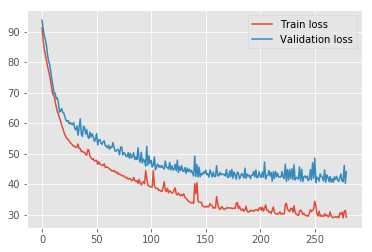

In [19]:
start = 20
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [20]:
# Интерфейс такой же как и в sklearn
model.predict(X_test)[:5]

array([[ 6.218703],
       [19.066114],
       [23.226053],
       [25.807085],
       [26.084192]], dtype=float32)

In [21]:
# Но есть и отличия, например: 
# можно посмотреть на качество модели по всем указанным при коммпиляции метрикам. 
score = model.evaluate(X_test, y_test)
score 

102/102 [==============================] - 0s 248us/sample - loss: 35.1230 - mae: 4.2405 - mse: 35.1230


[35.12297798605526, 4.240498, 35.122974]

Модель сходится довольно плохо. Функция потерь на валидации со временем начинает скакать. __Как думаете, с чем это связано?__

----------------------------------

Вспомним про такую замечательную штуку как нормальзация и посмотрим насколько она улучшит скорость обучения и качество модели.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучаем модель на нормализованных данных.

In [23]:
model = get_new_model( ) 
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=0)

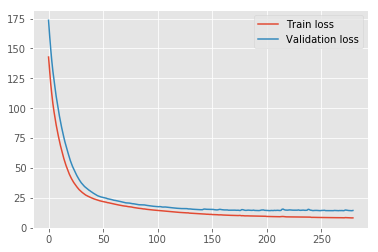

In [24]:
start = 20
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [25]:
score = model.evaluate(X_test, y_test)
score 

102/102 [==============================] - 0s 242us/sample - loss: 21.7306 - mae: 3.0494 - mse: 21.7306


[21.73057586071538, 3.0493958, 21.730576]

Модель стала сходиться лучше. Давайте посмотрим что будет, если увеличить число эпох.

In [26]:
model = get_new_model( ) 
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=5000, verbose=0)

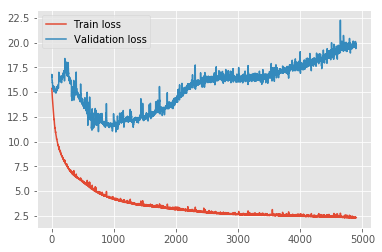

In [30]:
start = 100
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

Качество нашей модели на валидационных данных достигает пика после определенного количества эпох, а затем начинает снижаться. Это происходит из-за того, что модель начинает __переобучаться.__ Очень важно знать способы как можно предотвратить это. Переобученая модель просто запоминает выборку. Нам бы хотелось, чтобы она обобщала закономерности и адекватно вела себа на новых данных.

Обратным случаем переобучения является __недообучение.__ Оно возникает, когда все еще есть возможность улучшить показатели модели на проверочном наборе данных. Недообучение может произойти по разным причинам: например, если модель недостаточно сильная, или слишком сложная, или просто недостаточно тренировалась на данных. В любом случае это будет означать, что не были выучены основные паттерны из проверочного сета. Нам нужно найти золотую середину.

Чтобы избежать переобучения, наиболее оптимальным решением будет использовать больше тренировочных данных. Модели, обученные на большем количестве данных, естественным образом обобщают их лучше. Если возможность раздобыть ещё данных исчерпана, можно использовать методы регуляризации. Они ограничивают количество и тип инофрмации, которые модель может хранить в себе. Если нейросеть может запомнить только небольшое количество паттернов, то тогда процесс оптимизации заставит ее сфокусироваться на самых важных, наиболее заметных шаблонах, которые будут иметь более высокий шанс обобщения. __Попробуем дать переобучению бой!__

# 3. Бои с переобучением

Существует несколько способов регуляризации нейронных сетей. 

* EarlyStopping
* $l_1$ и $l_2$ регуляризация 
* Dropout

Попробуем всего по немногу. 

## 3.1 Early stopping

Одни сети сходятся за 5 эпох, другие не сходятся и за тысячу. Тренировать сетку в течение 1000 эпох, если она сходится за 5 - это не очень хорошая идея, так как качество на валидации начнёт падать и модель переобучится. Давайте попробуем останавливать обучение модели, как только оценка качества модели на валидации падает в течение нескольких эпох.

In [34]:
# Подгружаем раннюю остановку
from tensorflow.keras.callbacks import EarlyStopping

# Прикажем модели останавливать обучение, когда качество на валидации не будет улучшаться в течение 50 эпох
# Параметр patience определяет количество эпох, которые можно пропустить без улучшений
early_stopping_monitor = EarlyStopping(patience = 200)

model = get_new_model( ) # Сбросим старые веса 

# Функция для контроля остановки добавляется в параметр callbacks
hist_baseline = model.fit(X_train, y_train, validation_split=0.2, epochs=10000, 
                  verbose=0, callbacks = [early_stopping_monitor])

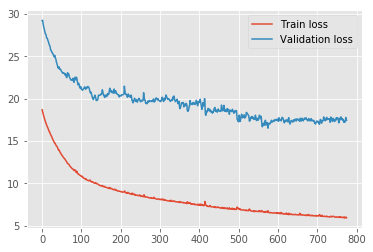

In [35]:
start = 100
plt.plot(hist_baseline.history['loss'][start:])
plt.plot(hist_baseline.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [36]:
score = model.evaluate(X_test, y_test)
score 

102/102 [==============================] - 0s 231us/sample - loss: 18.9618 - mae: 2.8749 - mse: 18.9618


[18.96176940319585, 2.8748572, 18.961771]

Немного подробнее поговорим про __колбэки,__ которые закидываются в метод `fit` отдельным аргументом. Колбэки - это специальные функции, которые выполняются в процессе обучения на каждой эпохе и что-то делают. Давайте напишем свой колбэк. 

Когда сетка учится $1000$ эпох, очень неудобно включать параметр `verbose=1`, та как выдача захламляет тетрадку. При этом, за прогрессом следить хочется. Давайте сделаем функцию, которая после каждой эпохи будет рисовать точку. Тогда мы сможем компактно следить за ходом обучения. 

__Немного сложностей.__ Свой колбэк нужно писать в виде класса. Он пишется на основе уже готового класса `Callback` из пакета keras. Внутри можно делать разные функции, сообщающие что нужно делать на разных этапах обучения.

Понятное дело, что можно писать любые другие вспомогательные функции. Шестёрка, упомянутая выше, задаёт основную функциональность. Напишем свой колбэк! 

In [37]:
from tensorflow.keras import callbacks

class PrintDot(callbacks.Callback):

    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')

In [38]:
dot_printer = PrintDot( )  # задали экземпляр такого колбэка
model = get_new_model( )   # сбросим старые веса 

# Закидываем новый колбэк в список функций 
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10000, 
                  verbose=0, callbacks = [early_stopping_monitor, dot_printer])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
................................

Дальше мы будем обучать довольно много разных моделей. Сделаем удобную функцию, чтобы рисовать их кривые обучения на одной картинке рядышком. 

In [54]:
def plot_history(histories, key='loss', start=0):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch[start:], history.history['val_'+key][start:],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch[start:], history.history[key][start:], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([start, max(history.epoch)])
    pass

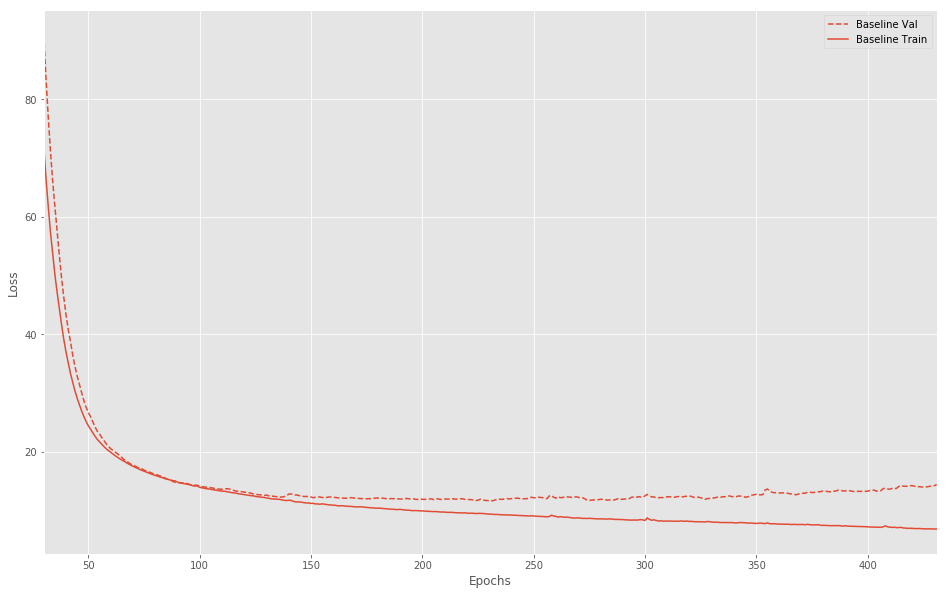

In [56]:
# Пример применения такой функции (через запятую можно перечислять имена моделей и их hist): 
plot_history([('baseline', hist), ],
             start=30 )

## 4.2 Регуляризация

Теперь добавим к нашей модели штраф на веса. Уменьшив коэффициенты модели, мы её упростим. Тем самым мы предотвратим переобучение.  В keras можно добавить для каждого слоя на три вида связей: 
	
* kernel\_regulirizer - на матрицу весов слоя;
* bias\_regulirizer - на вектор свободных членов;
* kernel\_regulirizer - на вектор выходов.

Значение `l2(100)` означает, что каждый коэффицент матрицы весов слоя будет добавлять `100 * weight_coefficient_value**2` к общей потери сети. Обрати внимание, что штраф добавляется только во время обучения, потери во время этой стадии будут гораздо выше, чем во время проверки.

In [66]:
from tensorflow.keras import regularizers

lam = 100

model = Sequential( )
model.add(layers.Dense(10, input_dim = X_train.shape[1], kernel_regularizer=regularizers.l2(lam)))
model.add(layers.Activation('relu'))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(lam)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(1))

optimizer = opt.Adam(lr=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [67]:
# Учим 1000 эпох без early_stopping
hist_regular = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, 
                  verbose=0, callbacks = [PrintDot( )])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

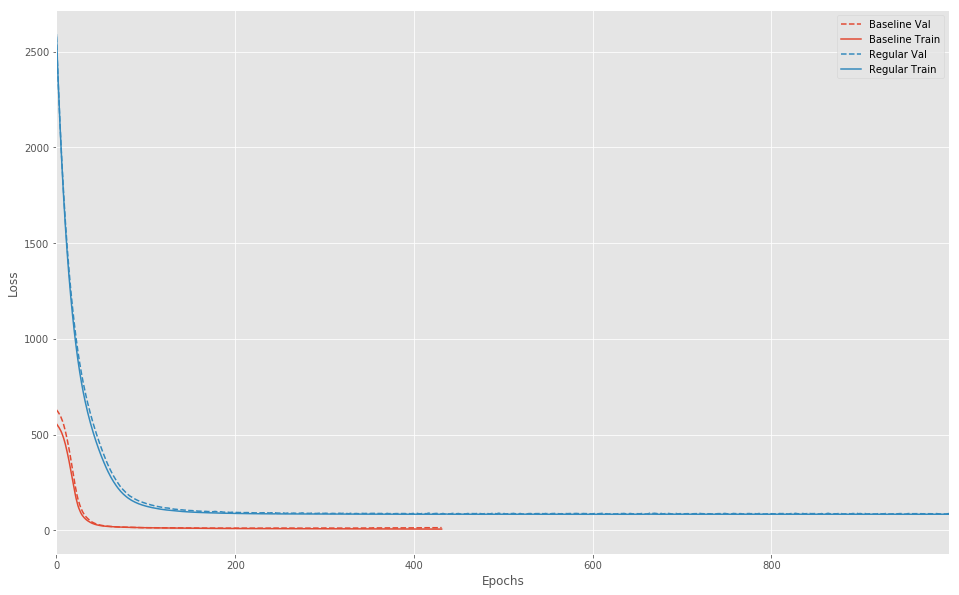

In [68]:
plot_history([('baseline', hist),
              ('regular', hist_regular)],
             start=0 )

## 4.3  Dropout 

Метод ранней остановки позволял нам никак не видоизменять архитектуру нейросетки. Мы просто закидывали в процедуру, отвечающую за обучение, дополнительные характеристики. Но этого мало, Давайте попробуем поменять архитекутуру нашей модели. Например, использовать новую модную штуку, придуманную в 2015 году с гордым именем Dropout. 

![](https://hsto.org/web/dd8/171/16f/dd817116fc2348e78272577153e31d2d.jpeg)



In [69]:
model_dropout = Sequential( )

# Первый слой 
model_dropout.add(layers.Dense(10, input_dim = X_train.shape[1], kernel_initializer='random_normal'))
model_dropout.add(layers.Dropout(0.2)) # слой дропаута
model_dropout.add(layers.Activation('relu'))

# Второй слой 
model_dropout.add(layers.Dense(10, kernel_initializer='random_normal'))
model_dropout.add(layers.Dropout(0.2))
model_dropout.add(layers.Activation('relu'))

# Выходной слой 
model_dropout.add(layers.Dense(1,kernel_initializer = 'random_normal'))

# Собираем модель 
model_dropout.compile(loss='mse', metrics=['mae', 'mse'], optimizer=opt.Adam(lr=1e-3))

In [70]:
hist_do = model_dropout.fit(X_train, y_train, validation_split=0.2, epochs=1000, 
                         verbose=0, callbacks = [PrintDot( )])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

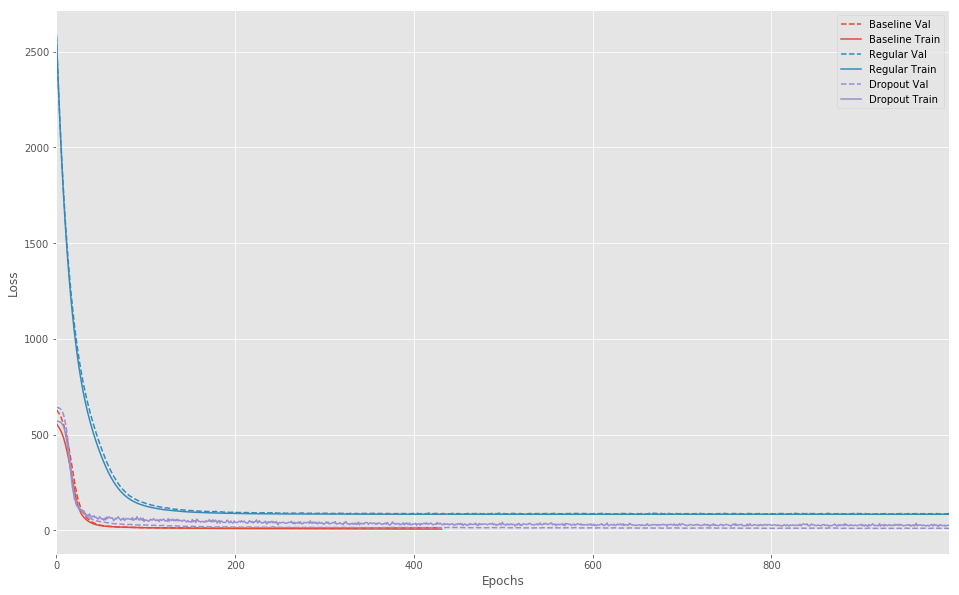

In [74]:
plot_history([('baseline', hist),
              ('regular', hist_regular),
              ('dropout', hist_do)
             ],
             start=0)

### Различные воспитательные трюки 

1. Начните с маленькой сети. Не забывайте прикидывать сколько наблдюдений $n$ тратится на оценку каждого из $k$ параметров. Если величина $\frac{n}{k}$ очень маленькая, то не может идти речи об адекватных оценках параметров!  
2. Всегда оставляйте часть выборки под валидацию на каждой эпохе.
3. Усложняйте модель, пока качество на валидации не начнёт падать.
4. Не забывайте проскалировать ваши наблюдения для лучшей сходимости. 
5. Можно попробовать ещё целую серию различных **трюков**: 


* __Архитектура нейросети__
    * Больше/меньше нейронов
    * Больше/меньше слоёв 
    * Другие функции активации (tanh, relu, leaky relu, elu etc) 
    * Регуляризация (dropout, l1,l2) 


* __Более качественная оптимизация__  
    * Можно попробовать выбрать другой метод оптимизации 
    * Можно попробовать менять скорость обучения, моментум и др.
    * Разные начальные значения весов


* __Попробовать собрать больше данных__ 
* __Для случая картинок объёмы данных можно увеличить искусственно с помощью подхода, который называется Data augmemntation, но об этом позже__

И это далеко не полный список. Обратите внимание, что делать grid_search для больших сеток это довольно времязатратное занятие... 

## 5. Эксперименты 

Наверняка, у каждого в голове возникла какая-то классная идея по улучшению нашей базовой архитектуры. Пора реализовать её! Если идей нет, попробуйте: 

- Поменять функции активации на elu или сигмоиды
- Увеличить размер архитектуры 
- Увеличить или уменьшить вероятность дропауте

Не забывайте сохранять историю обучения и закидывать её на наш график для сравнения. Когда надоест, посмотрите на итоговое качество модели на тесте. А то по валидации и переобучиться можно :) 

In [ ]:
# Ваши эксперименты и код для них! 

